In [37]:
#Import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import*
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [38]:
# Load College admission datasets
admission=pd.read_csv("Admission_Predict_Ver1.1.csv")

#Normalize numeric values, TOFEL Score and GRE score
# I use standardized normalization to norm the TOFEL scores and GRE scores
TFscore= admission.loc[:,"TOEFL Score"]
TFscore=pd.DataFrame(TFscore)
GREscore= admission.loc[:,"GRE Score"]
GREscore=pd.DataFrame(GREscore)

standard_scaler = StandardScaler().fit(TFscore)
standard_scaler
standard_scaler2 = StandardScaler().fit(GREscore)
standard_scaler2

normed_TOFEL_Score = standard_scaler.transform(TFscore)
normed_GRE_Score = standard_scaler.transform(GREscore)
admission["normed_GRE"]=normed_GRE_Score
admission["normed_TOFEL"]=normed_TOFEL_Score

In [39]:
# I will bin the Tofel scores in the dataset based on percentiles
# I have assigned 5 bins, at the 20%,40%,60%,80%, and 100& percentile.
# Here are the procedure to create the 5 bins. The bounds for each bin and the corresponding percentiles
# are printed below
x=admission["TOEFL Score"]
x=pd.DataFrame(x)
NumberOfBins=5
percentiles = np.linspace(0, 100, NumberOfBins + 1)
bounds = np.percentile(x, percentiles)
print(bounds)
print(percentiles)

# I decode categorical data "Research" type into research university and teaching university
# 1 represents research university, 0 represent teaching university 
Replace1=admission.loc[:,"Research"]==1
Replace2=admission.loc[:,"Research"]==0
admission.loc[Replace1,"Research"]="Research_Univeristy"
admission.loc[Replace2,"Research"]="Teaching_Univeristy"

#I do not have any missing data in this dataset
# If there are missing values in the Research Category, I will impute the data in the following way
MissingValue = admission.loc[:,"Research"] == "?"
admission.loc[MissingValue, "Research"] = "No_Type"

# I will consolidate the categorical data "University Rating"
# Instead of 5 categories of ratings, I consolidated it into 3 categories 
# Low rating, medium rating, and high rating
admission["University Rating"]
admission.loc[admission.loc[:,"University Rating"]==1,"University Rating"]="Low rating"
admission.loc[admission.loc[:,"University Rating"]==2,"University Rating"]="Low rating"
admission.loc[admission.loc[:,"University Rating"]==3,"University Rating"]="Medium rating"
admission.loc[admission.loc[:,"University Rating"]==4,"University Rating"]="High rating"
admission.loc[admission.loc[:,"University Rating"]==5,"University Rating"]="High rating"

#One-hot encode categorical data with at least 3 categories (at least 1 column)

# Create 3 new columns, one for each state in "Shape"
admission.loc[:, "Low Rating"] = (admission.loc[:, "University Rating"] == "Low rating").astype(int)
admission.loc[:, "Medium Rating"] = (admission.loc[:, "University Rating"] == "Medium rating").astype(int)
admission.loc[:, "High Rating"] = (admission.loc[:, "University Rating"] == "High rating").astype(int)

#Remove obsolete columns.
admission = admission.drop("University Rating", axis=1)

[ 92. 102. 105. 109. 113. 120.]
[  0.  20.  40.  60.  80. 100.]


Research question : I will use the normed TOFEL scores to predict whether this is a 
Teaching University or Research University ?

In [14]:
# I will apply kmeans to Normed GRE and save the cluster into "Normed_GRE_Cluster"
admission.loc[:,"GRE Score_cluster"] = KMeans(n_clusters=2, random_state=0).fit(pd.DataFrame(admission.loc[:,"GRE Score"])).labels_
# I will apply kmeans to Normed TOFEL and save the cluster into "Normed_TOFEL_Cluster"
admission.loc[:,"TOEFL Score Score_cluster"] = KMeans(n_clusters=2, random_state=0).fit(pd.DataFrame(admission.loc[:,"TOEFL Score"])).labels_

In [15]:
admission.dtypes

Serial No.                     int64
GRE Score                      int64
TOEFL Score                    int64
SOP                          float64
LOR                          float64
CGPA                         float64
Research                      object
Chance of Admit              float64
normed_GRE                   float64
normed_TOFEL                 float64
Low Rating                     int64
Medium Rating                  int64
High Rating                    int64
GRE Score_cluster              int32
TOEFL Score Score_cluster      int32
dtype: object

In [20]:
# I set the training data to be 80% and testing to be 20%
r=0.2 # test_size=r 
X = pd.DataFrame(admission.loc[:,"normed_TOFEL"])
Y = admission.loc[:,"Research"]
# I split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = r, random_state = 32)

In [21]:
# I will apply a Decision Tree classification method to analyze the data

print('\n\nDecision Tree classifier\n')
clf = DecisionTreeClassifier() # default hyper-parameters are fine
clf.fit(X_train, y_train)
print("predictions for test set:")
print(clf.predict_proba(X_test))
print('actual class values:')
print(y_test.tolist())



Decision Tree classifier

predictions for test set:
[[0.28571429 0.71428571]
 [0.33333333 0.66666667]
 [0.84615385 0.15384615]
 [0.3125     0.6875    ]
 [0.70967742 0.29032258]
 [0.6        0.4       ]
 [0.23809524 0.76190476]
 [0.07142857 0.92857143]
 [0.82608696 0.17391304]
 [0.07142857 0.92857143]
 [0.60869565 0.39130435]
 [0.6        0.4       ]
 [0.35       0.65      ]
 [0.93333333 0.06666667]
 [0.07142857 0.92857143]
 [0.60869565 0.39130435]
 [0.70967742 0.29032258]
 [0.70967742 0.29032258]
 [0.36842105 0.63157895]
 [0.30434783 0.69565217]
 [0.70967742 0.29032258]
 [0.33333333 0.66666667]
 [0.70967742 0.29032258]
 [0.3125     0.6875    ]
 [0.82608696 0.17391304]
 [0.23809524 0.76190476]
 [0.875      0.125     ]
 [0.         1.        ]
 [0.07142857 0.92857143]
 [0.82608696 0.17391304]
 [0.84615385 0.15384615]
 [0.         1.        ]
 [0.84615385 0.15384615]
 [0.3125     0.6875    ]
 [0.60869565 0.39130435]
 [0.36842105 0.63157895]
 [0.42857143 0.57142857]
 [0.36842105 0.631578

In [40]:
# I will saved the prediction results in to a csv file
predicted_actual=pd.DataFrame({'trueClass':clf.predict(X_test),'probabilities':clf.predict_proba(X_test)[:,1]})
predicted_actual.to_csv("actualClass_vs_probabilities.csv")

In [23]:
# I will calculate the accuracy rate, 
# which is the number of correct predictions divided by the total number of predictions 
AR = accuracy_score(y_test.tolist(), clf.predict(X_test))
AR

0.67

In [41]:
# Import the results from the previous predictions that I used the TOFEL Score to predict whether it was a Teaching or Research University 
# I further decode the types into 0 and 1
UniveristyType=pd.read_csv("actualClass_vs_probabilities.csv")
Replace1=UniveristyType.loc[:,"trueClass"]=="Teaching_Univeristy"
Replace2=UniveristyType.loc[:,"trueClass"]=="Research_Univeristy"
UniveristyType.loc[Replace1,"trueClass"]=1
UniveristyType.loc[Replace2,"trueClass"]=0


In [42]:
T=UniveristyType["trueClass"]
y=UniveristyType["probabilities"]
Y=np.round(y,0)

# I will create the Confusion Matrix, caluclate the precision score,recall score, F1 score, 
# and error rate to examine how well my classification is
CM = confusion_matrix(T, Y)
print ("\n\nConfusion matrix:\n", CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(T, Y)
print ("\nAccuracy rate:", AR)
ER = 1.0 - AR
print ("\nError rate:", ER)
P = precision_score(T, Y)
print ("\nPrecision:", np.round(P, 2))
R = recall_score(T, Y)
print ("\nRecall:", np.round(R, 2))
F1 = f1_score(T, Y)
print ("\nF1 score:", np.round(F1, 2))



Confusion matrix:
 [[51  0]
 [ 0 49]]

TP, TN, FP, FN: 49 , 51 , 0 , 0

Accuracy rate: 1.0

Error rate: 0.0

Precision: 1.0

Recall: 1.0

F1 score: 1.0


In [32]:
# I will perform the ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))


TP rates: [0.06 0.24 0.33 0.39 0.69 0.78 0.88 1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.  ]

FP rates: [0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.06 0.1  0.2  0.45 0.55
 0.63 0.73 0.78 0.8  0.88 1.  ]

Probability thresholds: [1.   0.93 0.76 0.71 0.67 0.65 0.63 0.57 0.47 0.44 0.4  0.39 0.29 0.17
 0.17 0.15 0.12 0.11 0.07 0.  ]


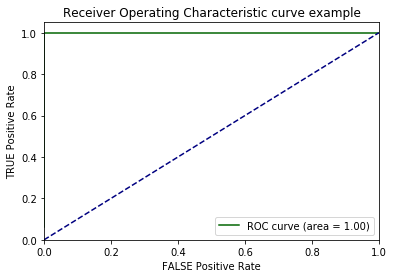

In [33]:
# I will present the ROC and AUC using plot
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

In [36]:
# Here are the AUC score
print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, y), 2), "\n")


AUC score (using auc function): 1.0

AUC score (using roc_auc_score function): 1.0 



The results indicated that my classification of the university type was very good. Normed TOEFL score based on admission can predict whether this is a research or teaching university.